In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

from classifier.detector_classifier import DetectorClassifier
from concept_drift.adwin import AdWin
from evaluation.prequential import prequential

In [4]:
def read_data(filename):
    df = pd.read_csv(filename)
    data = df.values
    return data[:, :-1], data[:, -1]


GaussianNB:
Mean acc within the window 300: 73.22457902031908

AdWin:
Drift detection: 168
Mean acc within the window 300: 74.65794479341767


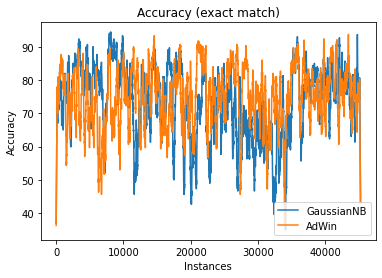

In [5]:
n_train = 100
X, y = read_data("data/elecNormNew.csv")
X = X.astype(float)
label = ["UP", "DOWN"]
le = preprocessing.LabelEncoder()
le.fit(label)
y = le.transform(y)
   
w = 300

clfs = [
     GaussianNB(),
     DetectorClassifier(GaussianNB(), AdWin(), np.unique(y))
]
clfs_label = ["GaussianNB", "AdWin"]

plt.title("Accuracy (exact match)")
plt.xlabel("Instances")
plt.ylabel("Accuracy")
    
for i in range(len(clfs)):
    print("\n{}:".format(clfs_label[i]))
    with np.errstate(divide='ignore', invalid='ignore'):
        y_pre, time = prequential(X, y, clfs[i], n_train)
    if clfs[i].__class__.__name__ == "DetectorClassifier":
        print("Drift detection: {}".format(clfs[i].change_detected))
    estimator = (y[n_train:] == y_pre) * 100

    acc_run = np.convolve(estimator, np.ones((w,)) / w, 'same')
    print("Mean acc within the window {}: {}".format(w, np.mean(acc_run)))
    plt.plot(acc_run, "-", label=clfs_label[i])

plt.legend(loc='lower right')   

# Plot diagram for GaussianNB



GaussainNB:
Mean acc within the window 300: 0.7322457902031905


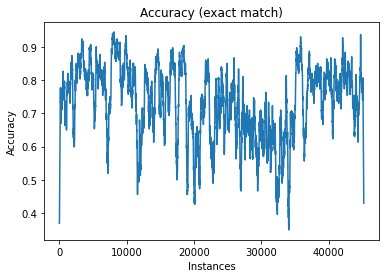

In [6]:
clfs=[GaussianNB()]
clfs_label=["GaussainNB"]
print("\n{}:".format(clfs_label[0]))
with np.errstate(divide='ignore', invalid='ignore'):
    y_pre, time = prequential(X, y, clfs[0], n_train)
estimator = (y[n_train:] == y_pre) * 1
plt.title("Accuracy (exact match)")
plt.xlabel("Instances")
plt.ylabel("Accuracy")
acc_run = np.convolve(estimator, np.ones((w,)) / w, 'same')
print("Mean acc within the window {}: {}".format(w, np.mean(acc_run)))
plt.plot(acc_run, "-", label=clfs_label[0])

# Plot diagram for Adwin


Adwin:
Drift detection: 168
Mean acc within the window 300: 0.7465794479341764


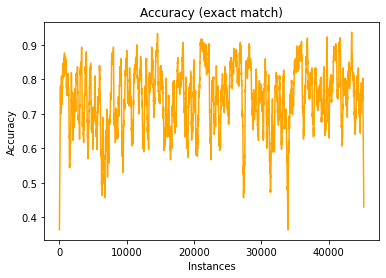

In [7]:
clfs=[DetectorClassifier(GaussianNB(), AdWin(), np.unique(y))]
clfs_label=["Adwin"]
print("\n{}:".format(clfs_label[0]))
with np.errstate(divide='ignore', invalid='ignore'):
    y_pre, time = prequential(X, y, clfs[0], n_train)
if clfs[0].__class__.__name__ == "DetectorClassifier":
    print("Drift detection: {}".format(clfs[0].change_detected))
estimator = (y[n_train:] == y_pre) * 1
plt.title("Accuracy (exact match)")
plt.xlabel("Instances")
plt.ylabel("Accuracy")
acc_run = np.convolve(estimator, np.ones((w,)) / w, 'same')
print("Mean acc within the window {}: {}".format(w, np.mean(acc_run)))
plt.plot(acc_run, "-", label=clfs_label[0],color='orange')